<a href="https://colab.research.google.com/github/KSK123123/AIFFEL_quest_cr/blob/master/Python/keras/subquestb17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
len(train_data[0]), len(train_data[1]), len(train_data[2])

(87, 56, 139)

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train.shape

(8982, 10000)

In [ ]:
# 라벨 46개

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
import tensorflow as tf

# User-defined block (Model Subclassing)
class CustomBlock(Model):
    def __init__(self, units, activation='relu'):
        super(CustomBlock, self).__init__()
        self.dense1 = Dense(units, activation=activation)
        self.dense2 = Dense(units // 2, activation=activation)

    def call(self, inputs):
        x = self.dense1(inputs)
        return self.dense2(x)

# User-defined model class
class CustomModel(Model):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.block1 = CustomBlock(64)
        self.output_layer = Dense(46, activation='softmax')

    # Deeper structure
    def call(self, inputs):
        x = self.block1(inputs)
        return self.output_layer(x)

    # Custom training step without learning rate adjustment
    def train_step(self, data):
        x, y = data

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)  # Model prediction
            loss = self.compiled_loss(y, y_pred)  # Calculate loss

        gradients = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))
        self.compiled_metrics.update_state(y, y_pred)

        return {m.name: m.result() for m in self.metrics}

# Create the model
model = CustomModel()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])

# Build and summarize the model
model.build(input_shape=(None, 10000))
model.summary()

# Define the learning rate scheduler callback
def lr_scheduler(epoch, lr):
    if epoch != 0 and epoch % 5 == 0:
        new_lr = lr * 0.9
        print(f"\nEpoch {epoch}: Learning rate adjusted to {new_lr:.5f}.")
        return new_lr
    return lr

# When fitting the model, use the LearningRateScheduler
# model.fit(train_dataset, epochs=..., callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_scheduler)])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'custom_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "custom_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ custom_block (CustomBlock)           │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
layer = model.fit(x=x_train, y=tf.keras.utils.to_categorical(train_labels), batch_size=512, epochs=20, validation_split=0.2)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:607: UserWarning: `model.compiled_loss()` is deprecated. Instead, use `model.compute_loss(x, y, y_pred, sample_weight, training)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:582: UserWarning: `model.compiled_metrics()` is deprecated. Instead, use e.g.:
```
for metric in self.metrics:
    metric.update_state(y, y_pred)
```

  return self._compiled_metrics_update_state(


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.3103 - loss: 0.0217 - val_accuracy: 0.5698 - val_loss: 2.6910
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.5790 - loss: 0.0217 - val_accuracy: 0.6127 - val_loss: 1.8016
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.6456 - loss: 0.0217 - val_accuracy: 0.6878 - val_loss: 1.4555
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7398 - loss: 0.0217 - val_accuracy: 0.7262 - val_loss: 1.2748
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7870 - loss: 0.0217 - val_accuracy: 0.7457 - val_loss: 1.1695
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8297 - loss: 0.0217 - val_accuracy: 0.7641 - val_loss: 1.0957
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8631 - loss: 0.0217 - val_accuracy: 0.7780 - val_loss: 1.0391
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8842 - loss: 0.0217 - val_accuracy: 0.7841 - val_loss: 1

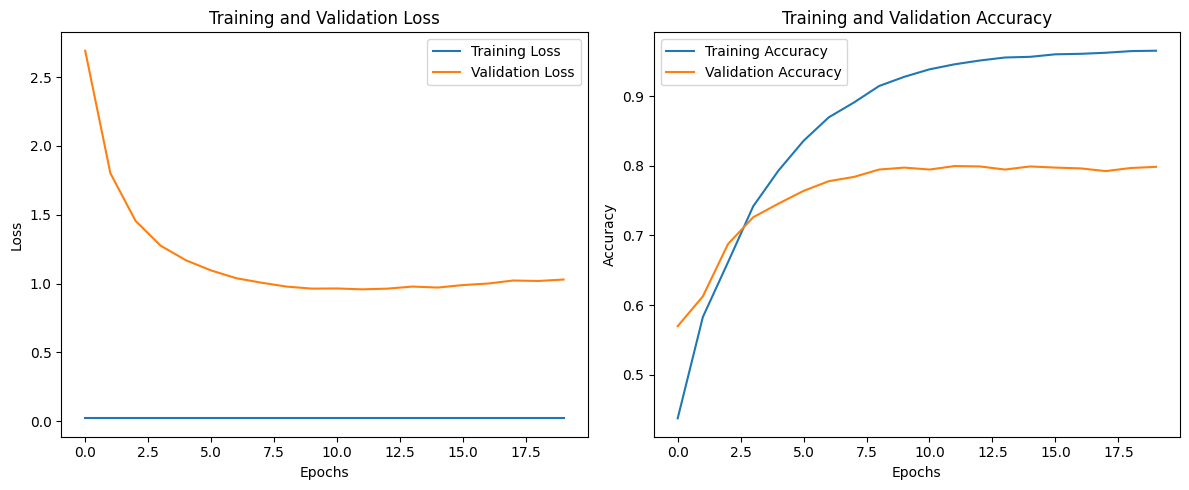

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # 학습 및 검증 손실 시각화
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # 학습 및 검증 정확도 시각화
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 모델 학습 후 결과 시각화
plot_training_history(layer)

# 1. 레이어 변경

## 레이어를 넓게 변경해보기

In [ ]:
# 레이어를 넓게 변경

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
import tensorflow as tf

# 사용자 정의 블록 (모델 서브클래싱)
class CustomBlock(Model):
    def __init__(self, units, activation='relu'):
        super(CustomBlock, self).__init__()
        self.dense1 = Dense(units * 2, activation=activation)  # 유닛 수를 2배로 늘림
        self.dense2 = Dense(units, activation=activation)  # 유닛 수를 그대로 유지

    def call(self, inputs):
        x = self.dense1(inputs)
        return self.dense2(x)

# 사용자 정의 모델 클래스
class CustomModel(Model):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.block1 = CustomBlock(128)  # 유닛 수를 128로 증가
        self.output_layer = Dense(46, activation='softmax')

    # 깊은 구조
    def call(self, inputs):
        x = self.block1(inputs)
        return self.output_layer(x)

    # 학습률 조정 없이 사용자 정의 학습 단계
    def train_step(self, data):
        x, y = data

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)  # 모델 예측
            loss = self.compiled_loss(y, y_pred)  # 손실 계산

        gradients = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))
        self.compiled_metrics.update_state(y, y_pred)

        return {m.name: m.result() for m in self.metrics}

# 모델 생성
model = CustomModel()

# 모델 컴파일
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 빌드 및 요약
model.build(input_shape=(None, 10000))
model.summary()

# 학습률 스케줄러 콜백 정의
def lr_scheduler(epoch, lr):
    if epoch != 0 and epoch % 5 == 0:
        new_lr = lr * 0.9
        print(f"\nEpoch {epoch}: 학습률이 {new_lr:.5f}로 조정되었습니다.")
        return new_lr
    return lr

# 모델 학습 시 LearningRateScheduler 사용
# model.fit(train_dataset, epochs=..., callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_scheduler)])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'custom_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "custom_model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ custom_block_1 (CustomBlock)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
wide_layer = model.fit(x=x_train, y=tf.keras.utils.to_categorical(train_labels), batch_size=512, epochs=20, validation_split=0.2)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 196ms/step - accuracy: 0.3925 - loss: 0.0217 - val_accuracy: 0.6477 - val_loss: 1.6824
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - accuracy: 0.6916 - loss: 0.0217 - val_accuracy: 0.7362 - val_loss: 1.2623
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.7918 - loss: 0.0217 - val_accuracy: 0.7679 - val_loss: 1.0675
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 0.8509 - loss: 0.0217 - val_accuracy: 0.7941 - val_loss: 0.9653
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.9089 - loss: 0.0217 - val_accuracy: 0.7991 - val_loss: 0.9587
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 195ms/step - accuracy: 0.9355 - loss: 0.0217 - val_accuracy: 0.7935 - val_loss: 0.9429
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - accuracy: 0.9537 - loss: 0.0217 - val_accuracy: 0.8024 - val_loss: 0.9311
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.9555 - loss: 0.0217 - val_accuracy: 0.

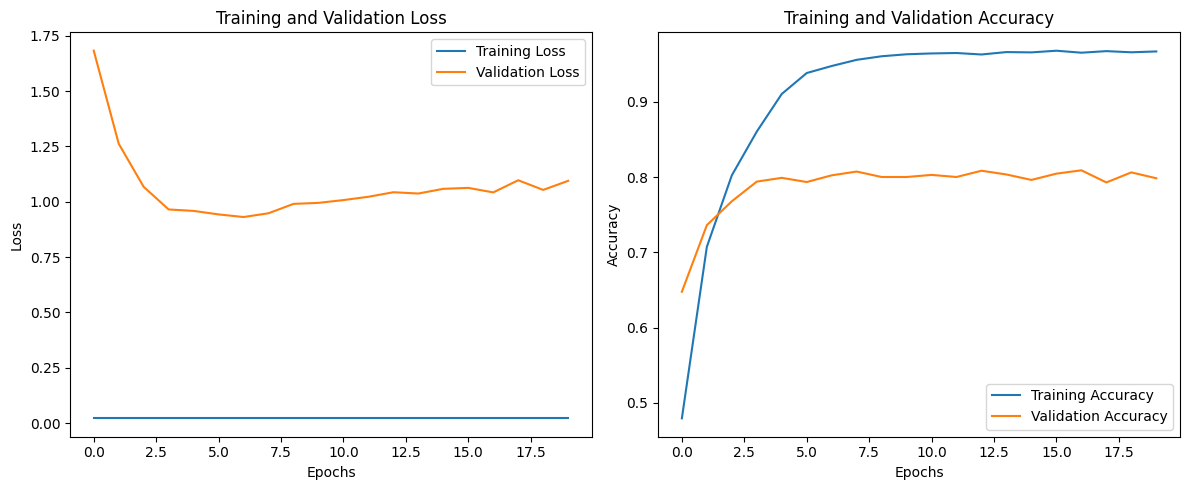

In [ ]:
# 모델 학습 후 결과 시각화
plot_training_history(wide_layer)

## 레이어를 깊게 변경해보기

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
import tensorflow as tf

# 사용자 정의 블록 (모델 서브클래싱)
class CustomBlock(Model):
    def __init__(self, units, activation='relu'):
        super(CustomBlock, self).__init__()
        self.dense1 = Dense(units, activation=activation)  # 유닛 수를 그대로 유지
        self.dense2 = Dense(units, activation=activation)  # 유닛 수를 그대로 유지

    def call(self, inputs):
        x = self.dense1(inputs)
        return self.dense2(x)

# 사용자 정의 모델 클래스
class CustomModel(Model):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.block1 = CustomBlock(64)  # 유닛 수를 64로 설정
        self.block2 = CustomBlock(64)  # 두 번째 블록 추가
        self.block3 = CustomBlock(64)  # 세 번째 블록 추가
        self.output_layer = Dense(46, activation='softmax')

    # 깊은 구조
    def call(self, inputs):
        x = self.block1(inputs)
        x = self.block2(x)
        x = self.block3(x)
        return self.output_layer(x)

    # 학습률 조정 없이 사용자 정의 학습 단계
    def train_step(self, data):
        x, y = data

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)  # 모델 예측
            loss = self.compiled_loss(y, y_pred)  # 손실 계산

        gradients = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))
        self.compiled_metrics.update_state(y, y_pred)

        return {m.name: m.result() for m in self.metrics}

# 모델 생성
model = CustomModel()

# 모델 컴파일
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 빌드 및 요약
model.build(input_shape=(None, 10000))
model.summary()

# 학습률 스케줄러 콜백 정의
def lr_scheduler(epoch, lr):
    if epoch != 0 and epoch % 5 == 0:
        new_lr = lr * 0.9
        print(f"\nEpoch {epoch}: 학습률이 {new_lr:.5f}로 조정되었습니다.")
        return new_lr
    return lr

# 모델 학습 시 LearningRateScheduler 사용
# model.fit(train_dataset, epochs=..., callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_scheduler)])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'custom_model_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "custom_model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ custom_block_2 (CustomBlock)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ custom_block_3 (CustomBlock)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ custom_block_4 (CustomBlock)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
deep_layer = model.fit(x=x_train, y=tf.keras.utils.to_categorical(train_labels), batch_size=512, epochs=20, validation_split=0.2)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.2548 - loss: 0.0217 - val_accuracy: 0.3450 - val_loss: 3.0385
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.4344 - loss: 0.0217 - val_accuracy: 0.5186 - val_loss: 1.9089
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.5494 - loss: 0.0217 - val_accuracy: 0.6338 - val_loss: 1.5650
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.6626 - loss: 0.0217 - val_accuracy: 0.6811 - val_loss: 1.3804
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.7147 - loss: 0.0217 - val_accuracy: 0.7090 - val_loss: 1.2791
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.7265 - loss: 0.0217 - val_accuracy: 0.7173 - val_loss: 1.2628
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7928 - loss: 0.0217 - val_accuracy: 0.7340 - val_loss: 1.2506
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8328 - loss: 0.0217 - val_accuracy: 0.7429 - v

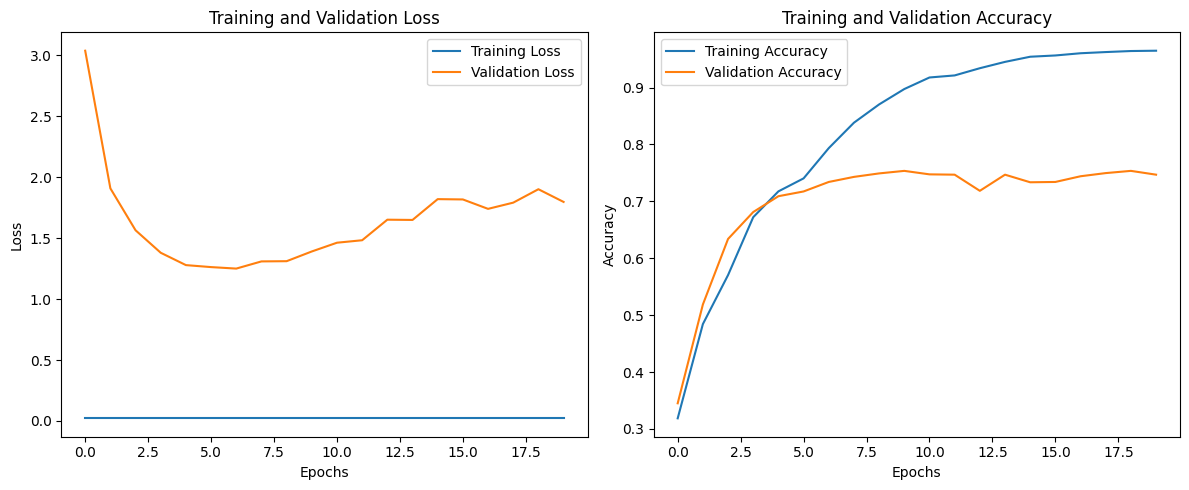

In [ ]:
# 모델 학습 후 결과 시각화
plot_training_history(deep_layer)

## 3가지 그래프를 비교하기 위해 한번에 학습 진행

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'custom_model_3', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "custom_model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ custom_block_5 (CustomBlock)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'custom_model_4', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "custom_model_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ custom_block_6 (CustomBlock)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'custom_model_5', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "custom_model_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ custom_block_7 (CustomBlock)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ custom_block_8 (CustomBlock)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ custom_block_9 (CustomBlock)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.3424 - loss: 0.0217 - val_accuracy: 0.5287 - val_loss: 2.5315 - learning_rate: 0.0010
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.5494 - loss: 0.0217 - val_accuracy: 0.6416 - val_loss: 1.7120 - learning_rate: 0.0010
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6628 - loss: 0.0217 - val_accuracy: 0.7001 - val_loss: 1.4058 - learning_rate: 0.0010
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7453 - loss: 0.0217 - val_accuracy: 0.7390 - val_loss: 1.2367 - learning_rate: 0.0010
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7933 - loss: 0.0217 - val_accuracy: 0.7513 - val_loss: 1.1386 - learning_rate: 0.0010

Epoch 5: 학습률이 0.00090로 조정되었습니다.
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.8385 - loss: 0.0217 - val_accuracy: 0.7724 - val_loss: 1.0733 - learning_rate: 9.0000e-04
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accu

<ipython-input-15-6b64d8af662b>:95: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  plt.tight_layout()
<ipython-input-15-6b64d8af662b>:95: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  plt.tight_layout()
<ipython-input-15-6b64d8af662b>:95: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from current font.
  plt.tight_layout()
<ipython-input-15-6b64d8af662b>:95: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from current font.
  plt.tight_layout()
<ipython-input-15-6b64d8af662b>:95: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  plt.tight_layout()
<ipython-input-15-6b64d8af662b>:95: UserWarning: Glyph 54984 (\N{HANGUL SYLLABLE HUN}) missing from current font.
  plt.tight_layout()
<ipython-input-15-6b64d8af662b>:95: UserWarning: Glyph 47144 (\N{HANGUL SYLLABLE RYEON}) missing from current font.
  plt.tight_layout()
<ipython-input-15-6b64d8af662b>:95: UserWarning: Glyph 4

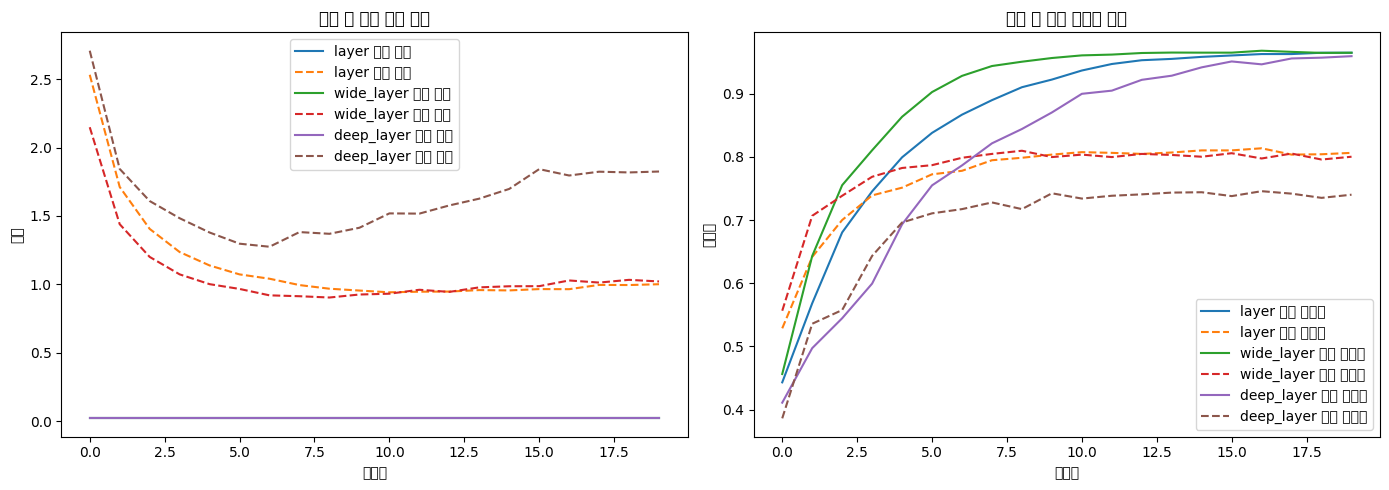

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt

# 사용자 정의 블록 (모델 서브클래싱)
class CustomBlock(Model):
    def __init__(self, units, activation='relu'):
        super(CustomBlock, self).__init__()
        self.dense1 = Dense(units, activation=activation)  # 유닛 수를 그대로 유지
        self.dense2 = Dense(units, activation=activation)  # 유닛 수를 그대로 유지

    def call(self, inputs):
        x = self.dense1(inputs)
        return self.dense2(x)

# 사용자 정의 모델 클래스
class CustomModel(Model):
    def __init__(self, depth=1, units=64):
        super(CustomModel, self).__init__()
        self.blocks = [CustomBlock(units) for _ in range(depth)]  # 깊이에 따라 블록 생성
        self.output_layer = Dense(46, activation='softmax')

    # 깊은 구조
    def call(self, inputs):
        x = inputs
        for block in self.blocks:
            x = block(x)
        return self.output_layer(x)

    # 학습률 조정 없이 사용자 정의 학습 단계
    def train_step(self, data):
        x, y = data

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)  # 모델 예측
            loss = self.compiled_loss(y, y_pred)  # 손실 계산

        gradients = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))
        self.compiled_metrics.update_state(y, y_pred)

        return {m.name: m.result() for m in self.metrics}

# 모델 생성
layer = CustomModel(depth=1, units=64)  # 기본 레이어
wide_layer = CustomModel(depth=1, units=128)  # 넓은 레이어
deep_layer = CustomModel(depth=3, units=64)  # 깊은 레이어

# 모델 컴파일
for model in [layer, wide_layer, deep_layer]:
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    model.build(input_shape=(None, 10000))
    model.summary()

# 학습률 스케줄러 콜백 정의
def lr_scheduler(epoch, lr):
    if epoch != 0 and epoch % 5 == 0:
        new_lr = lr * 0.9
        print(f"\nEpoch {epoch}: 학습률이 {new_lr:.5f}로 조정되었습니다.")
        return new_lr
    return lr

# 모델 학습
histories = {}
for model_name, model in zip(['layer', 'wide_layer', 'deep_layer'], [layer, wide_layer, deep_layer]):
    histories[model_name] = model.fit(x=x_train, y=tf.keras.utils.to_categorical(train_labels),
                                      batch_size=512, epochs=20, validation_split=0.2,
                                      callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_scheduler)])

# 학습 결과 시각화
plt.figure(figsize=(14, 5))

# 손실 그래프 그리기
plt.subplot(1, 2, 1)
for model_name, history in histories.items():
    plt.plot(history.history['loss'], label=f'{model_name} 훈련 손실')
    plt.plot(history.history['val_loss'], linestyle='--', label=f'{model_name} 검증 손실')
plt.xlabel('에포크')
plt.ylabel('손실')
plt.title('훈련 및 검증 손실 비교')
plt.legend()

# 정확도 그래프 그리기
plt.subplot(1, 2, 2)
for model_name, history in histories.items():
    plt.plot(history.history['accuracy'], label=f'{model_name} 훈련 정확도')
    plt.plot(history.history['val_accuracy'], linestyle='--', label=f'{model_name} 검증 정확도')
plt.xlabel('에포크')
plt.ylabel('정확도')
plt.title('훈련 및 검증 정확도 비교')
plt.legend()

plt.tight_layout()
plt.show()


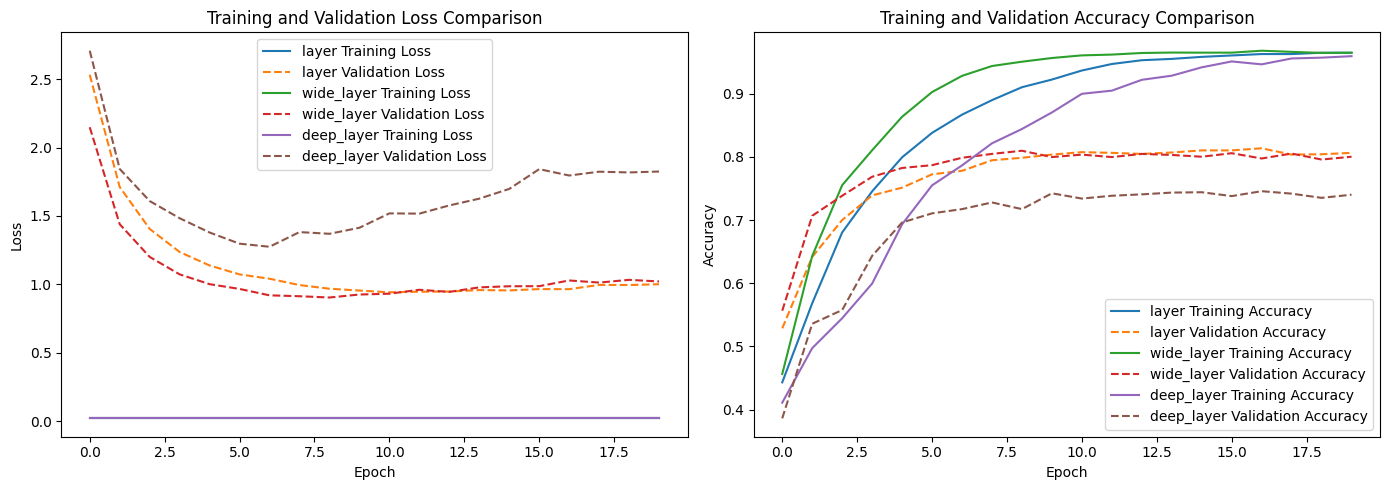

In [ ]:
# 학습 결과 시각화
plt.figure(figsize=(14, 5))

# 손실 그래프 그리기
plt.subplot(1, 2, 1)
for model_name, history in histories.items():
    plt.plot(history.history['loss'], label=f'{model_name} Training Loss')
    plt.plot(history.history['val_loss'], linestyle='--', label=f'{model_name} Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Comparison')
plt.legend()

# 정확도 그래프 그리기
plt.subplot(1, 2, 2)
for model_name, history in histories.items():
    plt.plot(history.history['accuracy'], label=f'{model_name} Training Accuracy')
    plt.plot(history.history['val_accuracy'], linestyle='--', label=f'{model_name} Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Comparison')
plt.legend()

plt.tight_layout()
plt.show()


### layer 변경에 따른 차이
- 해당 데이터에서는 기존 layer보다 deep layer에서 학습이 더 늦었음
- deep에서 눈에 띄게 validation loss 값이 눈에 띄게 낮음.

# 2. Learning rate 변경

# 0.1

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
import tensorflow as tf

# User-defined block (Model Subclassing)
class CustomBlock(Model):
    def __init__(self, units, activation='relu'):
        super(CustomBlock, self).__init__()
        self.dense1 = Dense(units, activation=activation)
        self.dense2 = Dense(units // 2, activation=activation)

    def call(self, inputs):
        x = self.dense1(inputs)
        return self.dense2(x)

# User-defined model class
class CustomModel(Model):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.block1 = CustomBlock(64)
        self.output_layer = Dense(46, activation='softmax')

    # Deeper structure
    def call(self, inputs):
        x = self.block1(inputs)
        return self.output_layer(x)

    # Custom training step without learning rate adjustment
    def train_step(self, data):
        x, y = data

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)  # Model prediction
            loss = self.compiled_loss(y, y_pred)  # Calculate loss

        gradients = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))
        self.compiled_metrics.update_state(y, y_pred)

        return {m.name: m.result() for m in self.metrics}

# Create the model
model = CustomModel()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

# Build and summarize the model
model.build(input_shape=(None, 10000))
model.summary()

# Define the learning rate scheduler callback
def lr_scheduler(epoch, lr):
    if epoch != 0 and epoch % 5 == 0:
        new_lr = lr * 0.9
        print(f"\nEpoch {epoch}: Learning rate adjusted to {new_lr:.5f}.")
        return new_lr
    return lr

# When fitting the model, use the LearningRateScheduler
# model.fit(train_dataset, epochs=..., callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_scheduler)])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'custom_model_6', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "custom_model_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ custom_block_10 (CustomBlock)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x=x_train, y=tf.keras.utils.to_categorical(train_labels), batch_size=512, epochs=20, validation_split=0.2)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.3237 - loss: 0.0217 - val_accuracy: 0.5637 - val_loss: 2.0100
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.5833 - loss: 0.0217 - val_accuracy: 0.5659 - val_loss: 1.7956
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.6078 - loss: 0.0217 - val_accuracy: 0.6110 - val_loss: 1.6962
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.6407 - loss: 0.0217 - val_accuracy: 0.6388 - val_loss: 1.6384
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6719 - loss: 0.0217 - val_accuracy: 0.6511 - val_loss: 1.7199
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6799 - loss: 0.0217 - val_accuracy: 0.6416 - val_loss: 1.6845
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7016 - loss: 0.0217 - val_accuracy: 0.6060 - val_loss: 1.8356
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6780 - loss: 0.0217 - val_accuracy: 0.6528 - 

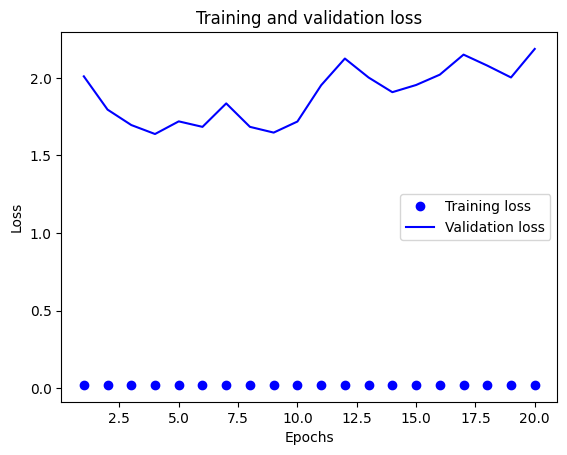

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 0.01

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
import tensorflow as tf

# User-defined block (Model Subclassing)
class CustomBlock(Model):
    def __init__(self, units, activation='relu'):
        super(CustomBlock, self).__init__()
        self.dense1 = Dense(units, activation=activation)
        self.dense2 = Dense(units // 2, activation=activation)

    def call(self, inputs):
        x = self.dense1(inputs)
        return self.dense2(x)

# User-defined model class
class CustomModel(Model):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.block1 = CustomBlock(64)
        self.output_layer = Dense(46, activation='softmax')

    # Deeper structure
    def call(self, inputs):
        x = self.block1(inputs)
        return self.output_layer(x)

    # Custom training step without learning rate adjustment
    def train_step(self, data):
        x, y = data

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)  # Model prediction
            loss = self.compiled_loss(y, y_pred)  # Calculate loss

        gradients = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))
        self.compiled_metrics.update_state(y, y_pred)

        return {m.name: m.result() for m in self.metrics}

# Create the model
model = CustomModel()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='categorical_crossentropy', metrics=['accuracy'])

# Build and summarize the model
model.build(input_shape=(None, 10000))
model.summary()

# Define the learning rate scheduler callback
def lr_scheduler(epoch, lr):
    if epoch != 0 and epoch % 5 == 0:
        new_lr = lr * 0.9
        print(f"\nEpoch {epoch}: Learning rate adjusted to {new_lr:.5f}.")
        return new_lr
    return lr

# When fitting the model, use the LearningRateScheduler
# model.fit(train_dataset, epochs=..., callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_scheduler)])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'custom_model_7', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "custom_model_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ custom_block_11 (CustomBlock)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x=x_train, y=tf.keras.utils.to_categorical(train_labels), batch_size=512, epochs=20, validation_split=0.2)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.4353 - loss: 0.0217 - val_accuracy: 0.6973 - val_loss: 1.3381
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.7518 - loss: 0.0217 - val_accuracy: 0.7652 - val_loss: 1.0708
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8461 - loss: 0.0217 - val_accuracy: 0.7858 - val_loss: 1.0377
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9143 - loss: 0.0217 - val_accuracy: 0.7741 - val_loss: 1.1274
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9548 - loss: 0.0217 - val_accuracy: 0.7913 - val_loss: 1.1740
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9660 - loss: 0.0217 - val_accuracy: 0.7846 - val_loss: 1.2851
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9639 - loss: 0.0217 - val_accuracy: 0.7852 - val_loss: 1.2406
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9682 - loss: 0.0217 - val_accuracy: 0.7913 - 

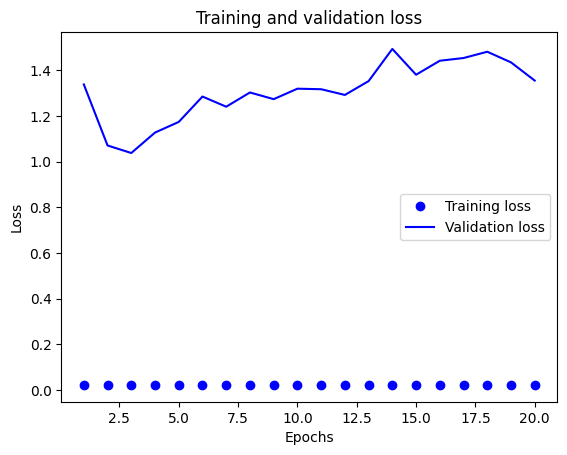

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 0.005

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
import tensorflow as tf

# User-defined block (Model Subclassing)
class CustomBlock(Model):
    def __init__(self, units, activation='relu'):
        super(CustomBlock, self).__init__()
        self.dense1 = Dense(units, activation=activation)
        self.dense2 = Dense(units // 2, activation=activation)

    def call(self, inputs):
        x = self.dense1(inputs)
        return self.dense2(x)

# User-defined model class
class CustomModel(Model):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.block1 = CustomBlock(64)
        self.output_layer = Dense(46, activation='softmax')

    # Deeper structure
    def call(self, inputs):
        x = self.block1(inputs)
        return self.output_layer(x)

    # Custom training step without learning rate adjustment
    def train_step(self, data):
        x, y = data

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)  # Model prediction
            loss = self.compiled_loss(y, y_pred)  # Calculate loss

        gradients = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))
        self.compiled_metrics.update_state(y, y_pred)

        return {m.name: m.result() for m in self.metrics}

# Create the model
model = CustomModel()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              loss='categorical_crossentropy', metrics=['accuracy'])

# Build and summarize the model
model.build(input_shape=(None, 10000))
model.summary()

# Define the learning rate scheduler callback
def lr_scheduler(epoch, lr):
    if epoch != 0 and epoch % 5 == 0:
        new_lr = lr * 0.9
        print(f"\nEpoch {epoch}: Learning rate adjusted to {new_lr:.5f}.")
        return new_lr
    return lr

# When fitting the model, use the LearningRateScheduler
# model.fit(train_dataset, epochs=..., callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_scheduler)])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'custom_model_8', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "custom_model_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ custom_block_12 (CustomBlock)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x=x_train, y=tf.keras.utils.to_categorical(train_labels), batch_size=512, epochs=20, validation_split=0.2)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.4698 - loss: 0.0217 - val_accuracy: 0.7151 - val_loss: 1.3657
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.7722 - loss: 0.0217 - val_accuracy: 0.7663 - val_loss: 1.0631
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.8594 - loss: 0.0217 - val_accuracy: 0.7947 - val_loss: 0.9730
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.9172 - loss: 0.0217 - val_accuracy: 0.8036 - val_loss: 0.9485
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9556 - loss: 0.0217 - val_accuracy: 0.8036 - val_loss: 0.9995
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9636 - loss: 0.0217 - val_accuracy: 0.7952 - val_loss: 1.0493
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9679 - loss: 0.0217 - val_accuracy: 0.7824 - val_loss: 1.1215
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9645 - loss: 0.0217 - val_accuracy: 0.8041 - v

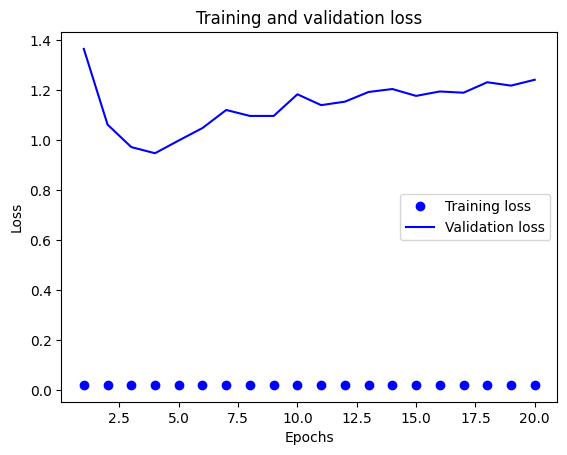

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 0.001

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
import tensorflow as tf

# User-defined block (Model Subclassing)
class CustomBlock(Model):
    def __init__(self, units, activation='relu'):
        super(CustomBlock, self).__init__()
        self.dense1 = Dense(units, activation=activation)
        self.dense2 = Dense(units // 2, activation=activation)

    def call(self, inputs):
        x = self.dense1(inputs)
        return self.dense2(x)

# User-defined model class
class CustomModel(Model):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.block1 = CustomBlock(64)
        self.output_layer = Dense(46, activation='softmax')

    # Deeper structure
    def call(self, inputs):
        x = self.block1(inputs)
        return self.output_layer(x)

    # Custom training step without learning rate adjustment
    def train_step(self, data):
        x, y = data

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)  # Model prediction
            loss = self.compiled_loss(y, y_pred)  # Calculate loss

        gradients = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))
        self.compiled_metrics.update_state(y, y_pred)

        return {m.name: m.result() for m in self.metrics}

# Create the model
model = CustomModel()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])

# Build and summarize the model
model.build(input_shape=(None, 10000))
model.summary()

# Define the learning rate scheduler callback
def lr_scheduler(epoch, lr):
    if epoch != 0 and epoch % 5 == 0:
        new_lr = lr * 0.9
        print(f"\nEpoch {epoch}: Learning rate adjusted to {new_lr:.5f}.")
        return new_lr
    return lr

# When fitting the model, use the LearningRateScheduler
# model.fit(train_dataset, epochs=..., callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_scheduler)])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'custom_model_9', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "custom_model_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ custom_block_13 (CustomBlock)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x=x_train, y=tf.keras.utils.to_categorical(train_labels), batch_size=512, epochs=20, validation_split=0.2)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.3459 - loss: 0.0217 - val_accuracy: 0.5364 - val_loss: 2.7352
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5622 - loss: 0.0217 - val_accuracy: 0.6461 - val_loss: 1.8434
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.6840 - loss: 0.0217 - val_accuracy: 0.7095 - val_loss: 1.4435
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7465 - loss: 0.0217 - val_accuracy: 0.7318 - val_loss: 1.2659
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.8006 - loss: 0.0217 - val_accuracy: 0.7546 - val_loss: 1.1525
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8327 - loss: 0.0217 - val_accuracy: 0.7607 - val_loss: 1.0888
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.8643 - loss: 0.0217 - val_accuracy: 0.7713 - val_loss: 1.0434
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8861 - loss: 0.0217 - val_accuracy: 0.7802 - v

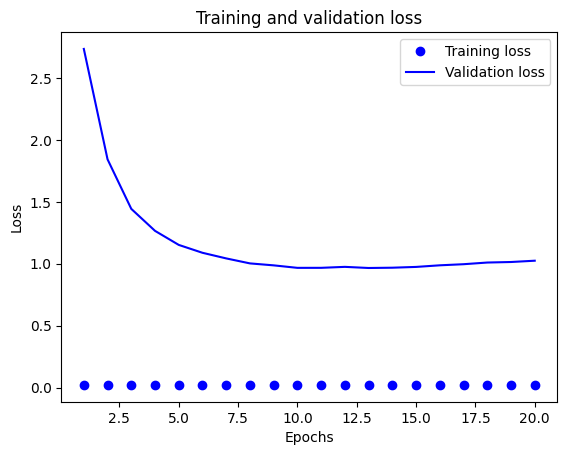

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 0.0005

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
import tensorflow as tf

# User-defined block (Model Subclassing)
class CustomBlock(Model):
    def __init__(self, units, activation='relu'):
        super(CustomBlock, self).__init__()
        self.dense1 = Dense(units, activation=activation)
        self.dense2 = Dense(units // 2, activation=activation)

    def call(self, inputs):
        x = self.dense1(inputs)
        return self.dense2(x)

# User-defined model class
class CustomModel(Model):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.block1 = CustomBlock(64)
        self.output_layer = Dense(46, activation='softmax')

    # Deeper structure
    def call(self, inputs):
        x = self.block1(inputs)
        return self.output_layer(x)

    # Custom training step without learning rate adjustment
    def train_step(self, data):
        x, y = data

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)  # Model prediction
            loss = self.compiled_loss(y, y_pred)  # Calculate loss

        gradients = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))
        self.compiled_metrics.update_state(y, y_pred)

        return {m.name: m.result() for m in self.metrics}

# Create the model
model = CustomModel()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='categorical_crossentropy', metrics=['accuracy'])

# Build and summarize the model
model.build(input_shape=(None, 10000))
model.summary()

# Define the learning rate scheduler callback
def lr_scheduler(epoch, lr):
    if epoch != 0 and epoch % 5 == 0:
        new_lr = lr * 0.9
        print(f"\nEpoch {epoch}: Learning rate adjusted to {new_lr:.5f}.")
        return new_lr
    return lr

# When fitting the model, use the LearningRateScheduler
# model.fit(train_dataset, epochs=..., callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_scheduler)])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'custom_model_10', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "custom_model_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ custom_block_14 (CustomBlock)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x=x_train, y=tf.keras.utils.to_categorical(train_labels), batch_size=512, epochs=20, validation_split=0.2)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.2132 - loss: 0.0217 - val_accuracy: 0.4513 - val_loss: 3.3677
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.4948 - loss: 0.0217 - val_accuracy: 0.5303 - val_loss: 2.7288
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.5577 - loss: 0.0217 - val_accuracy: 0.6066 - val_loss: 2.1435
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.6312 - loss: 0.0217 - val_accuracy: 0.6578 - val_loss: 1.7683
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.7043 - loss: 0.0217 - val_accuracy: 0.6856 - val_loss: 1.5460
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.7288 - loss: 0.0217 - val_accuracy: 0.7123 - val_loss: 1.4023
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7707 - loss: 0.0217 - val_accuracy: 0.7318 - val_loss: 1.2998
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8007 - loss: 0.0217 - val_accuracy: 0.7485 - v

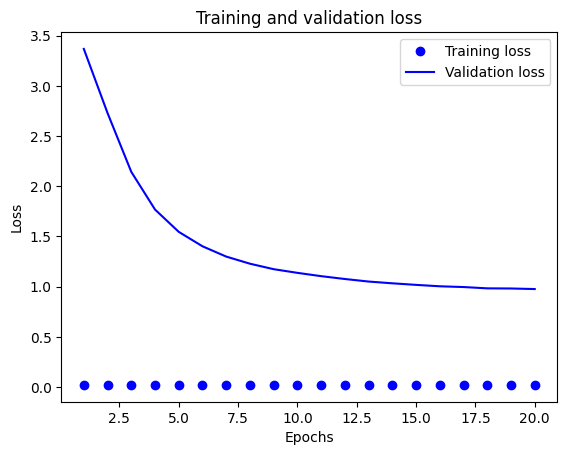

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### learning rate에 따른 차이
- learning rate가 높은 경우, 빠르게 하한값에 접근하지만 극점에 수렴하지 못하고 진동하거나 극점을 지나친다.
- learning rate가 낮은 경우, 극점에 수렴하기까지 시간이 오래 걸리지만(불필요한 학습) learning rate가 높을 때보다 더 낮은 loss 값을 보여준다. 때론, 지역최저점에 빠져 나오지 못하는 경우도 있음에 유의.

# 3. activation function 변경해보기
- relu, tanh, sigmoid

In [ ]:
# ReLU
history_dict_sigmoid = history.history

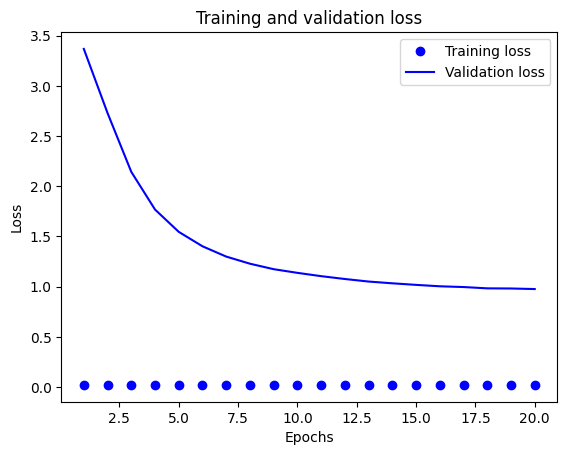

In [ ]:
import matplotlib.pyplot as plt
# relu

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

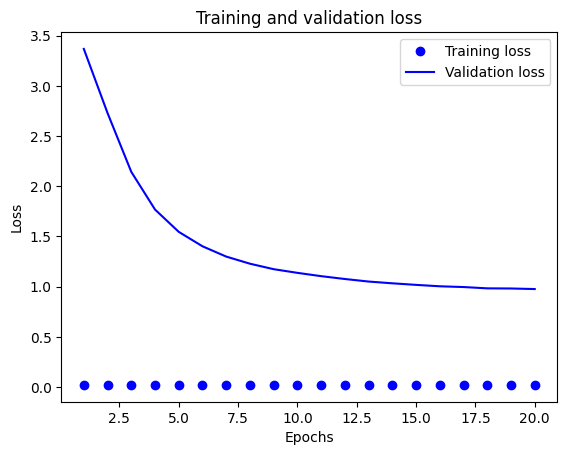

In [ ]:
#tanh

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

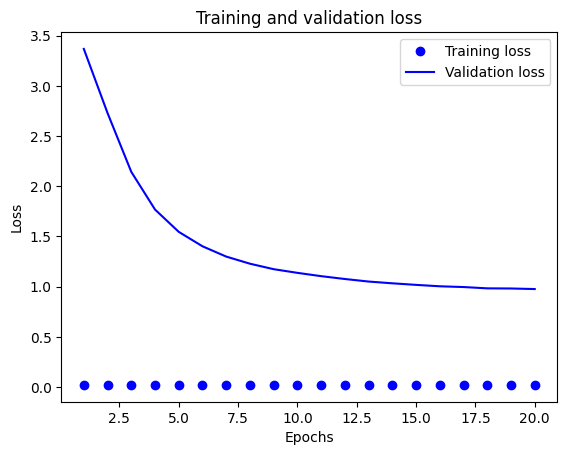

In [ ]:
#sigmoid

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# ReLU
loss_values_relu = history_dict_relu["loss"]
val_loss_values_relu = history_dict_relu["val_loss"]

loss_values_tanh = history_dict_tanh["loss"]
val_loss_values_tanh = history_dict_tanh["val_loss"]

# Sigmoid
loss_values_sigmoid = history_dict_sigmoid["loss"]
val_loss_values_sigmoid = history_dict_sigmoid["val_loss"]

# Epochs range
epochs = range(1, len(loss_values_relu) + 1)

# Plot training loss
plt.plot(epochs, loss_values_relu, "r-", label="ReLU Training loss")
plt.plot(epochs, loss_values_tanh, "g-", label="Tanh Training loss")
plt.plot(epochs, loss_values_sigmoid, "b-", label="Sigmoid Training loss")

# Plot validation loss
plt.plot(epochs, val_loss_values_relu, "r--", label="ReLU Validation loss")
plt.plot(epochs, val_loss_values_tanh, "g--", label="Tanh Validation loss")
plt.plot(epochs, val_loss_values_sigmoid, "b--", label="Sigmoid Validation loss")

# Graph details
plt.title("Training and Validation Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


NameError: name 'history_dict_relu' is not defined

### activation function 변경에 따른 차이
- 단순히 loss율로 따졌을 때 Sigmoid < ReLU < Tanh 순으로 성능이 좋다고 볼 수 있다.
- ReLU와 Tanh의 성능은 비슷해 보이는데 첫 에포크의 loss율 시작점을 보면 가중치 초기값이 Tanh를 썼을 때 더 좋았던 모양이다.

# 회고 작성
- 김민규 :
  - 아쉬운 점

    callback함수로 이미 구현되어 있는 기능이었다.

    좀 더 복잡한 데이터셋을 사용해봤으면 하이퍼 파라미터 변화에 따른 결과의 차이가 두드러졌을 것 같다.)
  - 좋은 점
    
    직접 사용자 정의 모델을 작성해볼 수 있는 좋은 경험이었다.

  - 앞으로
  
    다른 조에서 맡은 사용자 정의 평가 지표가 좀 더 중요한 내용인 것 같아 따로 시도해 볼 생각이다.

- 김우찬 : 너무나 어렵습니다... 열심히 공부해보겠읍니다...

- 김승기 : 7장에서 본 사용자 정의함수를 직접 테스트 해봤지만 아직 코드에 대한 이해가 부족한 것 같습니다. 책과 함께 보면서 계속 봐야 알 것 같습니다.

## 우리의 학습템플릿
- https://www.notion.so/modulabs/2b16dbae56d94193b676f562a41eeac3?p=42d95c72fac1493ba3fcdfc2f0a3db9b&pm=s